In [1]:
# To filter out warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data handling package
import pandas as pd

# Pinarayi

In [3]:
pinarayi_df = pd.read_csv("files/pinarayi.csv")

In [4]:
# Finding the names of the columns
pinarayi_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [5]:
# Selecting necessary columns from the dataset
df_pin = pinarayi_df[["date", "tweet", "hashtags"]].sort_values('date')

In [6]:
df_pin.head()

,date,tweet,hashtags
248,2020-03-04,State Govt is closely monitoring the #COVID19i...,['#covid19india']
247,2020-03-08,Women of this country have been victims of var...,"['#internationalwomensday', '#happywomensday20..."
246,2020-03-08,We are deeply saddened to learn of the passing...,[]
245,2020-03-09,24 മണിക്കൂറും പ്രവര്‍ത്തിക്കുന്ന സ്റ്റേറ്റ് കോ...,['#covid19']
243,2020-03-10,#COVID19 | Improving Readiness\n\nAs more peop...,['#covid19']


In [7]:
# Converting date column to DateTime object
df_pin['month_num'] = pd.DatetimeIndex(df_pin['date']).month

In [8]:
df_pin.head()

,date,tweet,hashtags,month_num
248,2020-03-04,State Govt is closely monitoring the #COVID19i...,['#covid19india'],3
247,2020-03-08,Women of this country have been victims of var...,"['#internationalwomensday', '#happywomensday20...",3
246,2020-03-08,We are deeply saddened to learn of the passing...,[],3
245,2020-03-09,24 മണിക്കൂറും പ്രവര്‍ത്തിക്കുന്ന സ്റ്റേറ്റ് കോ...,['#covid19'],3
243,2020-03-10,#COVID19 | Improving Readiness\n\nAs more peop...,['#covid19'],3


In [9]:
# Replacing with the Month names - used to sort the months in correct order
to_replace = {3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August' }
df_pin['month'] = df_pin['month_num'].map(to_replace)

In [10]:
df_pin.head()

,date,tweet,hashtags,month_num,month
248,2020-03-04,State Govt is closely monitoring the #COVID19i...,['#covid19india'],3,March
247,2020-03-08,Women of this country have been victims of var...,"['#internationalwomensday', '#happywomensday20...",3,March
246,2020-03-08,We are deeply saddened to learn of the passing...,[],3,March
245,2020-03-09,24 മണിക്കൂറും പ്രവര്‍ത്തിക്കുന്ന സ്റ്റേറ്റ് കോ...,['#covid19'],3,March
243,2020-03-10,#COVID19 | Improving Readiness\n\nAs more peop...,['#covid19'],3,March


In [11]:
# finding the word 'covid' in the hashtags
df_pin["Indexes"]= df_pin["hashtags"].str.find("covid") 

In [12]:
df_pin

,date,tweet,hashtags,month_num,month,Indexes
248,2020-03-04,State Govt is closely monitoring the #COVID19i...,['#covid19india'],3,March,3
247,2020-03-08,Women of this country have been victims of var...,"['#internationalwomensday', '#happywomensday20...",3,March,-1
246,2020-03-08,We are deeply saddened to learn of the passing...,[],3,March,-1
245,2020-03-09,24 മണിക്കൂറും പ്രവര്‍ത്തിക്കുന്ന സ്റ്റേറ്റ് കോ...,['#covid19'],3,March,3
243,2020-03-10,#COVID19 | Improving Readiness\n\nAs more peop...,['#covid19'],3,March,3
...,...,...,...,...,...,...
4,2020-08-22,Spoke to Payal Kumari. She is the topper of th...,[],8,August,-1
3,2020-08-28,It is the birth anniversary of Ayyankali. The ...,[],8,August,-1
2,2020-08-30,The 5th episode of the Kerala Dialogue feature...,[],8,August,-1
1,2020-08-31,ഹൃദയപൂര്‍വമായ ഓണാശംസകള്‍.\n#HappyOnam pic.twit...,['#happyonam'],8,August,-1


In [13]:
df_pin['Covid_Related'] = df_pin['Indexes'].apply(lambda x: 'False' if x == -1 else 'True')

In [14]:
df_pin

,date,tweet,hashtags,month_num,month,Indexes,Covid_Related
248,2020-03-04,State Govt is closely monitoring the #COVID19i...,['#covid19india'],3,March,3,True
247,2020-03-08,Women of this country have been victims of var...,"['#internationalwomensday', '#happywomensday20...",3,March,-1,False
246,2020-03-08,We are deeply saddened to learn of the passing...,[],3,March,-1,False
245,2020-03-09,24 മണിക്കൂറും പ്രവര്‍ത്തിക്കുന്ന സ്റ്റേറ്റ് കോ...,['#covid19'],3,March,3,True
243,2020-03-10,#COVID19 | Improving Readiness\n\nAs more peop...,['#covid19'],3,March,3,True
...,...,...,...,...,...,...,...
4,2020-08-22,Spoke to Payal Kumari. She is the topper of th...,[],8,August,-1,False
3,2020-08-28,It is the birth anniversary of Ayyankali. The ...,[],8,August,-1,False
2,2020-08-30,The 5th episode of the Kerala Dialogue feature...,[],8,August,-1,False
1,2020-08-31,ഹൃദയപൂര്‍വമായ ഓണാശംസകള്‍.\n#HappyOnam pic.twit...,['#happyonam'],8,August,-1,False


# Modi

In [15]:
# Merging all the parts into one single DataFrame

df1 = pd.read_csv('files/modi1.csv')
df2 = pd.read_csv('files/modi2.csv')
df3 = pd.read_csv('files/modi3.csv')
df4 = pd.read_csv('files/modi4.csv')
df5 = pd.read_csv('files/modi5.csv')
df6 = pd.read_csv('files/modi6.csv')
df7 = pd.read_csv('files/modi7.csv')
df8 = pd.read_csv('files/modi8.csv')

df_full = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8], ignore_index=True)
modi_df = df_full.sort_values('date', ascending = True)


In [16]:
modi_df = modi_df.reset_index(drop=True)

In [17]:
modi_df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1233948737854222337,1233948737854222337,1583031279000,2020-03-01,08:24:39,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,Greetings to Bihar’s Chief Minister and my fri...,en,en
1,1233948737854222337,1233948737854222337,1583031279000,2020-03-01,08:24:39,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,Greetings to Bihar’s Chief Minister and my fri...,en,en
2,1234333491724111873,1234333491724111873,1583123011000,2020-03-02,09:53:31,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,"My dear friend @kpsharmaoli ji, wishing you a ...",en,en
3,1234500451850018818,1234500451850018818,1583162818000,2020-03-02,20:56:58,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,"This Sunday, thinking of giving up my social m...",en,en
4,1234500451850018818,1234500451850018818,1583162818000,2020-03-02,20:56:58,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,"This Sunday, thinking of giving up my social m...",en,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1300266943987867651,1300266943987867651,1598842771000,2020-08-31,08:29:31,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,"Greetings on Onam. This is a unique festival, ...",en,en
1336,1300412575641862144,1300412575641862144,1598877493000,2020-08-31,18:08:13,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,India grieves the passing away of Bharat Ratna...,en,en
1337,1300412805816807424,1300412575641862144,1598877548000,2020-08-31,18:09:08,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,During his political career that spanned decad...,en,en
1338,1300413236429254656,1300412575641862144,1598877650000,2020-08-31,18:10:50,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,"As India’s President, Shri Pranab Mukherjee ma...",en,en


In [18]:
modi_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1233948737854222337,1233948737854222337,1583031279000,2020-03-01,08:24:39,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,Greetings to Bihar’s Chief Minister and my fri...,en,en
1,1233948737854222337,1233948737854222337,1583031279000,2020-03-01,08:24:39,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,Greetings to Bihar’s Chief Minister and my fri...,en,en
2,1234333491724111873,1234333491724111873,1583123011000,2020-03-02,09:53:31,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,"My dear friend @kpsharmaoli ji, wishing you a ...",en,en
3,1234500451850018818,1234500451850018818,1583162818000,2020-03-02,20:56:58,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,"This Sunday, thinking of giving up my social m...",en,en
4,1234500451850018818,1234500451850018818,1583162818000,2020-03-02,20:56:58,India Standard Time,18839785,narendramodi,Narendra Modi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '18839785', 'username': 'narendra...",NaN,"This Sunday, thinking of giving up my social m...",en,en


In [19]:
modi_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [20]:
# Required columns
df_modi = modi_df[["date", "translate", "hashtags"]]

In [21]:
df_modi.head()

,date,translate,hashtags
0,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[]
1,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[]
2,2020-03-02,"My dear friend @kpsharmaoli ji, wishing you a ...",[]
3,2020-03-02,"This Sunday, thinking of giving up my social m...",[]
4,2020-03-02,"This Sunday, thinking of giving up my social m...",[]


In [22]:
to_replace = {3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August'}
df_modi['month_num'] = pd.DatetimeIndex(df_modi['date']).month
df_modi['month'] = df_modi['month_num'].map(to_replace)

In [23]:
df_modi.head()

,date,translate,hashtags,month_num,month
0,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[],3,March
1,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[],3,March
2,2020-03-02,"My dear friend @kpsharmaoli ji, wishing you a ...",[],3,March
3,2020-03-02,"This Sunday, thinking of giving up my social m...",[],3,March
4,2020-03-02,"This Sunday, thinking of giving up my social m...",[],3,March


In [24]:
# To find unique hashtags
df_modi['hashtags'].unique()

array(['[]', "['#sheinspiresus']", "['#janjantakjanaushadhi']",
       "['#mannkibaat']", "['#indiafightscorona']",
       "['#rjcurfew', '#janatacurfew']", "['#janatacurfew']",
       "['#jantacurfew']", "['#jantacurfew', '#indiafightscorona']",
       "['#paysafeindia']", "['#stayhome']",
       "['#g20', '#g20virtualsummit']", "['#g20virtualsummit']",
       "['#mannkibaat', '#indiafightscorona']", "['#9pm9minute']",
       "['#bjpat40']", "['#worldhealthday']", "['#sangeetsetu']",
       "['#odianewyear']", "['#ambedkarjayanti']", "['#teammaskforce']",
       "['#earthday2020']", "['#aatmanirbharbharat']",
       "['#aatmanirbharbharatabhiyan']", "['#aatmanirbharbharatpackage']",
       "['#aatmanirbhardesh']", "['#ciiannualsession2020']",
       "['#gvs2020']", "['#worldenvironmentday']", "['#yogaday']",
       "['#doctorsday2020']", "['#betherevival', '#igw2020']",
       "['#5yearsofskillindia']", "['#indiaideassummit']",
       "['#mannkibaat', '#courageinkargil']",
       "['#

In [25]:
"""corona_hashtags = ['#indiafightscorona', '#indiafightscorona', '#jantacurfew','#janatacurfew','#stayhome' '#rjcurfew']

# common words are corona and curfew and stayhome
"""

"corona_hashtags = ['#indiafightscorona', '#indiafightscorona', '#jantacurfew','#janatacurfew','#stayhome' '#rjcurfew']\n\n# common words are corona and curfew and stayhome\n"

In [26]:
# Creating indexes to filter covid related hashtags
df_modi["Index1"]= df_modi["hashtags"].str.find("corona")
df_modi["Index2"]= df_modi["hashtags"].str.find("curfew")
df_modi["Index3"]= df_modi["hashtags"].str.find("stayhome")

In [27]:
df_modi

,date,translate,hashtags,month_num,month,Index1,Index2,Index3
0,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[],3,March,-1,-1,-1
1,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[],3,March,-1,-1,-1
2,2020-03-02,"My dear friend @kpsharmaoli ji, wishing you a ...",[],3,March,-1,-1,-1
3,2020-03-02,"This Sunday, thinking of giving up my social m...",[],3,March,-1,-1,-1
4,2020-03-02,"This Sunday, thinking of giving up my social m...",[],3,March,-1,-1,-1
...,...,...,...,...,...,...,...,...
1335,2020-08-31,"Greetings on Onam. This is a unique festival, ...",[],8,August,-1,-1,-1
1336,2020-08-31,India grieves the passing away of Bharat Ratna...,[],8,August,-1,-1,-1
1337,2020-08-31,During his political career that spanned decad...,[],8,August,-1,-1,-1
1338,2020-08-31,"As India’s President, Shri Pranab Mukherjee ma...",[],8,August,-1,-1,-1


In [28]:
# Creating a column Covid_Tag which outputs True if the hashtag is covid related

df_modi.loc[(df_modi['Index1'] == -1) & (df_modi['Index2'] == -1) & (df_modi['Index3'] == -1), 'Covid_Tag'] = False 
df_modi.loc[(df_modi['Covid_Tag'] != False), 'Covid_Tag'] = True

In [29]:
df_modi['Covid_Tag'].describe()

count      1340
unique        2
top       False
freq       1158
Name: Covid_Tag, dtype: object

In [30]:
#Words to filter Covid tweets from Trump and Modi

words = ['janta', 'janata','mask', 'covid',
         'corona', 'virus', 'curfew', 'distancing',
         'chinavirus', 'lockdown', 'quarantine', 'pandemic', 'kovid', 'jairbolsonaro', 'borisjohnson',
        'pm-cares', 'hydroxychloroquine']

# word kovid is included because translated covid from Hindi sometimes turn out to be Kovid
# word jairbolsanaro and 'BorisJohnson' are included because: Modi's tweet to
# them for a speedy recovery is a covid related tweet

def matcher(x):
    for i in words:
        if i in x.lower():
            return True
    else:
        return False

# Create new column Covid_Tweet which gives True if the translated Tweet is COVID-related   
    
df_modi['Covid_Tweet'] = df_modi['translate'].apply(matcher)

In [31]:
df_modi

,date,translate,hashtags,month_num,month,Index1,Index2,Index3,Covid_Tag,Covid_Tweet
0,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[],3,March,-1,-1,-1,False,False
1,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[],3,March,-1,-1,-1,False,False
2,2020-03-02,"My dear friend @kpsharmaoli ji, wishing you a ...",[],3,March,-1,-1,-1,False,False
3,2020-03-02,"This Sunday, thinking of giving up my social m...",[],3,March,-1,-1,-1,False,False
4,2020-03-02,"This Sunday, thinking of giving up my social m...",[],3,March,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...
1335,2020-08-31,"Greetings on Onam. This is a unique festival, ...",[],8,August,-1,-1,-1,False,False
1336,2020-08-31,India grieves the passing away of Bharat Ratna...,[],8,August,-1,-1,-1,False,False
1337,2020-08-31,During his political career that spanned decad...,[],8,August,-1,-1,-1,False,False
1338,2020-08-31,"As India’s President, Shri Pranab Mukherjee ma...",[],8,August,-1,-1,-1,False,False


In [32]:
# OR condition on columns Covid_Rag and Covid_Tweet

df_modi['Covid_Related'] = df_modi['Covid_Tag'] | df_modi['Covid_Tweet']

# | is the python operator OR

In [33]:
df_modi

,date,translate,hashtags,month_num,month,Index1,Index2,Index3,Covid_Tag,Covid_Tweet,Covid_Related
0,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[],3,March,-1,-1,-1,False,False,False
1,2020-03-01,Greetings to Bihar’s Chief Minister and my fri...,[],3,March,-1,-1,-1,False,False,False
2,2020-03-02,"My dear friend @kpsharmaoli ji, wishing you a ...",[],3,March,-1,-1,-1,False,False,False
3,2020-03-02,"This Sunday, thinking of giving up my social m...",[],3,March,-1,-1,-1,False,False,False
4,2020-03-02,"This Sunday, thinking of giving up my social m...",[],3,March,-1,-1,-1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1335,2020-08-31,"Greetings on Onam. This is a unique festival, ...",[],8,August,-1,-1,-1,False,False,False
1336,2020-08-31,India grieves the passing away of Bharat Ratna...,[],8,August,-1,-1,-1,False,False,False
1337,2020-08-31,During his political career that spanned decad...,[],8,August,-1,-1,-1,False,False,False
1338,2020-08-31,"As India’s President, Shri Pranab Mukherjee ma...",[],8,August,-1,-1,-1,False,False,False


# Trump

In [34]:
trump_df = pd.read_csv("files/trump.csv")

In [35]:
trump_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1300428396493758464,1300428396493758464,1598881265000,2020-08-31,19:11:05,India Standard Time,25073877,realdonaldtrump,Donald J. Trump,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '25073877', 'username': 'realDona...",NaN,NaN,NaN,NaN
1,1300428128309907457,1300428128309907457,1598881201000,2020-08-31,19:10:01,India Standard Time,25073877,realdonaldtrump,Donald J. Trump,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '25073877', 'username': 'realDona...",NaN,NaN,NaN,NaN
2,1300426765496725504,1300426765496725504,1598880876000,2020-08-31,19:04:36,India Standard Time,25073877,realdonaldtrump,Donald J. Trump,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '25073877', 'username': 'realDona...",NaN,NaN,NaN,NaN
3,1300421406849671168,1300421406849671168,1598879598000,2020-08-31,18:43:18,India Standard Time,25073877,realdonaldtrump,Donald J. Trump,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '25073877', 'username': 'realDona...",NaN,NaN,NaN,NaN
4,1300420725837266944,1300420725837266944,1598879436000,2020-08-31,18:40:36,India Standard Time,25073877,realdonaldtrump,Donald J. Trump,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '25073877', 'username': 'realDona...",NaN,NaN,NaN,NaN


In [36]:
trump_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [37]:
df_trump = trump_df[["date", "tweet"]].sort_values('date')

In [38]:
to_replace = {3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August'}
df_trump['month_num'] = pd.DatetimeIndex(df_trump['date']).month
df_trump['month'] = df_trump['month_num'].map(to_replace)

In [39]:
# Filtering Covid_Related Tweets
df_trump['Covid_Related'] = df_trump['tweet'].apply(matcher)

In [40]:
df_trump

,date,tweet,month_num,month,Covid_Related
2752,2020-03-01,Sleepy Joe Biden’s victory in the South Caroli...,3,March,False
2744,2020-03-01,The food is GREAT at Sammy’s Mexican Grill in ...,3,March,False
2745,2020-03-01,Coronavirus: In addition to screening traveler...,3,March,True
2746,2020-03-01,.....a very dark and lonely path! Your reputat...,3,March,False
2751,2020-03-01,Democrats are working hard to destroy the name...,3,March,False
...,...,...,...,...,...
12,2020-08-31,The only way you will stop the violence in the...,8,August,False
14,2020-08-31,....He tried mixing with the Agitators and Ana...,8,August,False
15,2020-08-31,"Ted Wheeler, the wacky Radical Left Do Nothing...",8,August,False
8,2020-08-31,Joe Biden is coming out of the basement earlie...,8,August,False


# Plotting

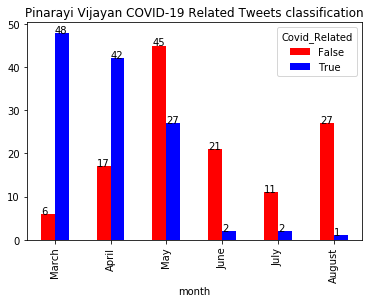

In [41]:
# Creating a groupby clause for Covid_Related tweets and plotting  the bar plot using pandas plot

plt1 = df_pin.groupby(['month','Covid_Related'], sort = True).size().unstack()
plt1 = plt1.reindex(['March', 'April','May', 'June', 'July', 'August'])
# plt1
ax1 = plt1.plot(kind='bar', color = ['red', 'blue'])
ax1.set_title('Pinarayi Vijayan COVID-19 Related Tweets classification')
for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

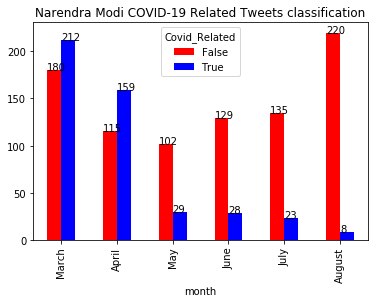

In [42]:
plt2 = df_modi.groupby(['month','Covid_Related'], sort = True).size().unstack()
plt2 = plt2.reindex(['March', 'April','May', 'June', 'July', 'August'])
# plt2
ax2 = plt2.plot(kind='bar', color = ['red', 'blue'])
ax2.set_title('Narendra Modi COVID-19 Related Tweets classification')
for p in ax2.patches:
    ax2.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

Percentage Plots

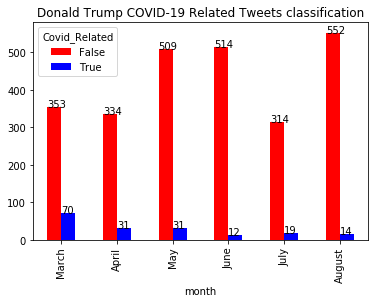

In [43]:
plt3 = df_trump.groupby(['month','Covid_Related'], sort = True).size().unstack()
plt3 = plt3.reindex(['March', 'April','May', 'June', 'July', 'August'])
# plt3
ax3 = plt3.plot(kind='bar', color = ['red', 'blue'])
ax3.set_title('Donald Trump COVID-19 Related Tweets classification')
for p in ax3.patches:
    ax3.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

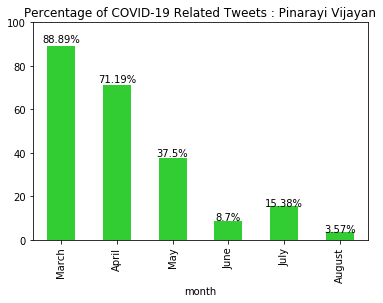

In [44]:
plt4 = df_pin.groupby(['month','Covid_Related'], sort = True).size().unstack()
plt4 = plt4.reindex(['March', 'April','May', 'June', 'July', 'August'])
plt4['percentage'] = round((plt4['True']/ (plt4['True']+ plt4['False'])*100),2)
#plt4

ax4 = plt4['percentage'].plot(kind='bar', color = 'limegreen')
ax4.set_title('Percentage of COVID-19 Related Tweets : Pinarayi Vijayan')
ax4.set_ylim(0,100) # Setting equal Scale from 0 to 100 for all plots

# Annotation
for p in ax4.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax4.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center') # formatting the annotation

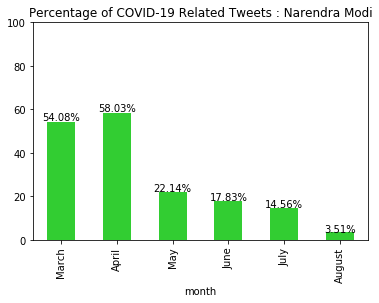

In [45]:
plt5 = df_modi.groupby(['month','Covid_Related'], sort = True).size().unstack()
plt5 = plt5.reindex(['March', 'April','May', 'June', 'July', 'August'])


plt5['percentage'] = round((plt5[True]/ (plt5[False]+ plt5[True])*100),2)
#plt5

ax5 = plt5['percentage'].plot(kind='bar', color = 'limegreen')
ax5.set_title('Percentage of COVID-19 Related Tweets : Narendra Modi')
ax5.set_ylim(0,100)

for p in ax5.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax5.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

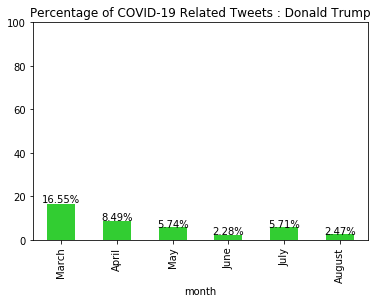

In [46]:
plt6 = df_trump.groupby(['month','Covid_Related'], sort = True).size().unstack()
plt6 = plt6.reindex(['March', 'April','May', 'June', 'July', 'August'])


plt6['percentage'] = round((plt6[True]/ (plt6[False]+ plt6[True])*100),2)
#plt6

ax6 = plt6['percentage'].plot(kind='bar', color = 'limegreen')
ax6.set_title('Percentage of COVID-19 Related Tweets : Donald Trump')
ax6.set_ylim(0,100)

# Annotation
for p in ax6.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax6.annotate(f'{height}%', (x + width/2, y + height*1.04), ha='center')